In [4]:
import pandas as pd
from venny4py.venny4py import *
import os
import glob

In [5]:
# Function to extract genes from a single sif file
def extract_genes_from_sif(file_path):
    genes = set()
    with open(file_path, 'r') as file:
        for line in file:
            if not line.startswith('#'):
                parts = line.strip().split('\t')
                if len(parts) == 3:
                    gene1, interaction, gene2 = parts
                    genes.add(gene1)
                    genes.add(gene2)
    return genes

In [10]:
# Path where sif files are located (adjust as necessary)
base_path = '../sif_files/'  # Update this to the correct path

# Find all sif files in subdirectories
sif_files = glob.glob(os.path.join(base_path, '**', '*Signor_with_complexes_Northcott.sif'), recursive=True)

# Dictionary to store genes grouped by sif file
genes_by_group = {}

# Process each sif file
for sif_file in sif_files:
    # Get the subfolder name as the group name
    subfolder_name = os.path.basename(os.path.dirname(sif_file))
    genes_by_group[subfolder_name] = extract_genes_from_sif(sif_file)

# Create a DataFrame from the dictionary with columns as groups (subfolder names)
df = pd.DataFrame.from_dict(genes_by_group, orient='index').transpose()

# Drop duplicates in each column
df = df.apply(lambda col: pd.Series(col.dropna().unique()), axis=0)

# Display the DataFrame
df = df.reset_index(drop=True)
df.rename(columns={'index': 'Group'}, inplace=True)

In [11]:
df

,WNT,SHH,group3,group4
0,SIRT1,SIRT1,SIRT1,TWIST1
1,TWIST1,CTNNB1,MTOR,CTNNB1
2,CTNNB1,FYN,CTNNB1,MYCN
3,SMARCE1,EGFR,SMARCE1,PER2
4,PER2,GNG12,SMAD2,ERG
...,...,...,...,...
97,TBX22,NaN,NaN,NaN
98,CDK6,NaN,NaN,NaN
99,SWI/SNF complex,NaN,NaN,NaN
100,ID1,NaN,NaN,NaN


In [17]:
len(df["group4"].dropna())

95

In [18]:
set1 = df['WNT'].dropna()
set2 = df['SHH'].dropna()
set3 = df['group3'].dropna()
set4 = df['group4'].dropna()

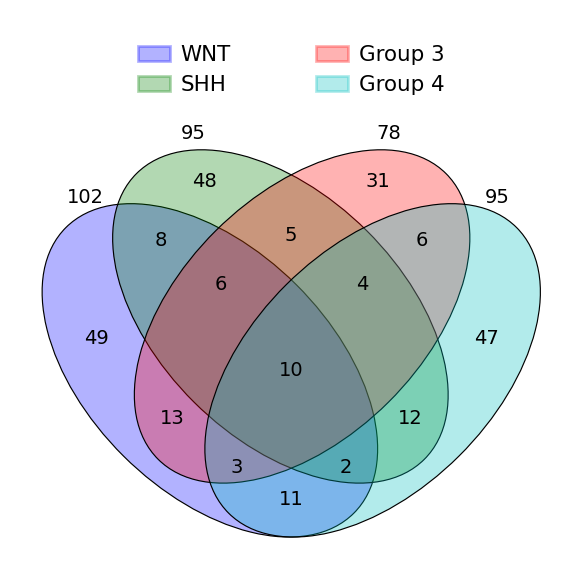

In [19]:
sets_2 = {
    'WNT': set(set1),
    'SHH': set(set2),
    'Group 3': set(set3),
    'Group 4': set(set4)
}

venny4py(sets=sets_2, out='../Figures')